[[0.26890035 0.65089438 0.83274183 ... 0.7847593  0.84307935 0.8220792 ]
 [0.2684825  0.65013964 0.85215319 ... 0.77648749 0.83860539 0.8220792 ]
 [0.26796671 0.65965652 0.823618   ... 0.76454632 0.80787913 0.78624615]
 ...
 [0.28757556 0.67995507 0.87437499 ... 0.68553825 0.4562634  0.44964453]
 [0.27703911 0.68644265 0.88086795 ... 0.66807728 0.44294321 0.43562373]
 [0.26650267 0.63467913 0.87874776 ... 0.65061631 0.4205186  0.41039566]]
[[0.18029533]
 [0.17712402]
 [0.17361771]
 ...
 [0.10736644]
 [0.11139095]
 [0.11698181]]
[[0.07251262 0.17554541 0.1644978  0.11892668 0.18129789 0.16759644
  0.1600645 ]
 [0.17554541 0.44898865 0.41384571 0.31047324 0.46369462 0.43972442
  0.42054069]
 [0.1644978  0.41384571 0.41918089 0.27972507 0.42275233 0.38840687
  0.3684781 ]
 [0.11892668 0.31047324 0.27972507 0.22632415 0.32381476 0.31286151
  0.29974897]
 [0.18129789 0.46369462 0.42275233 0.32381476 0.48641569 0.46573539
  0.44656821]
 [0.16759644 0.43972442 0.38840687 0.31286151 0.46573539

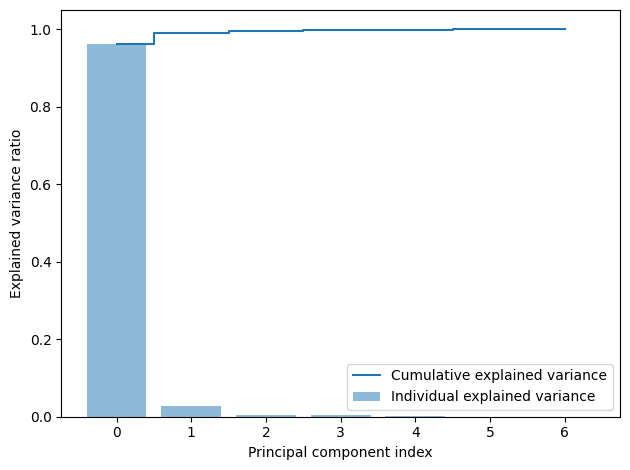

(7, 4)
(5, 1)
0.29682036453586
0.4658282410075606


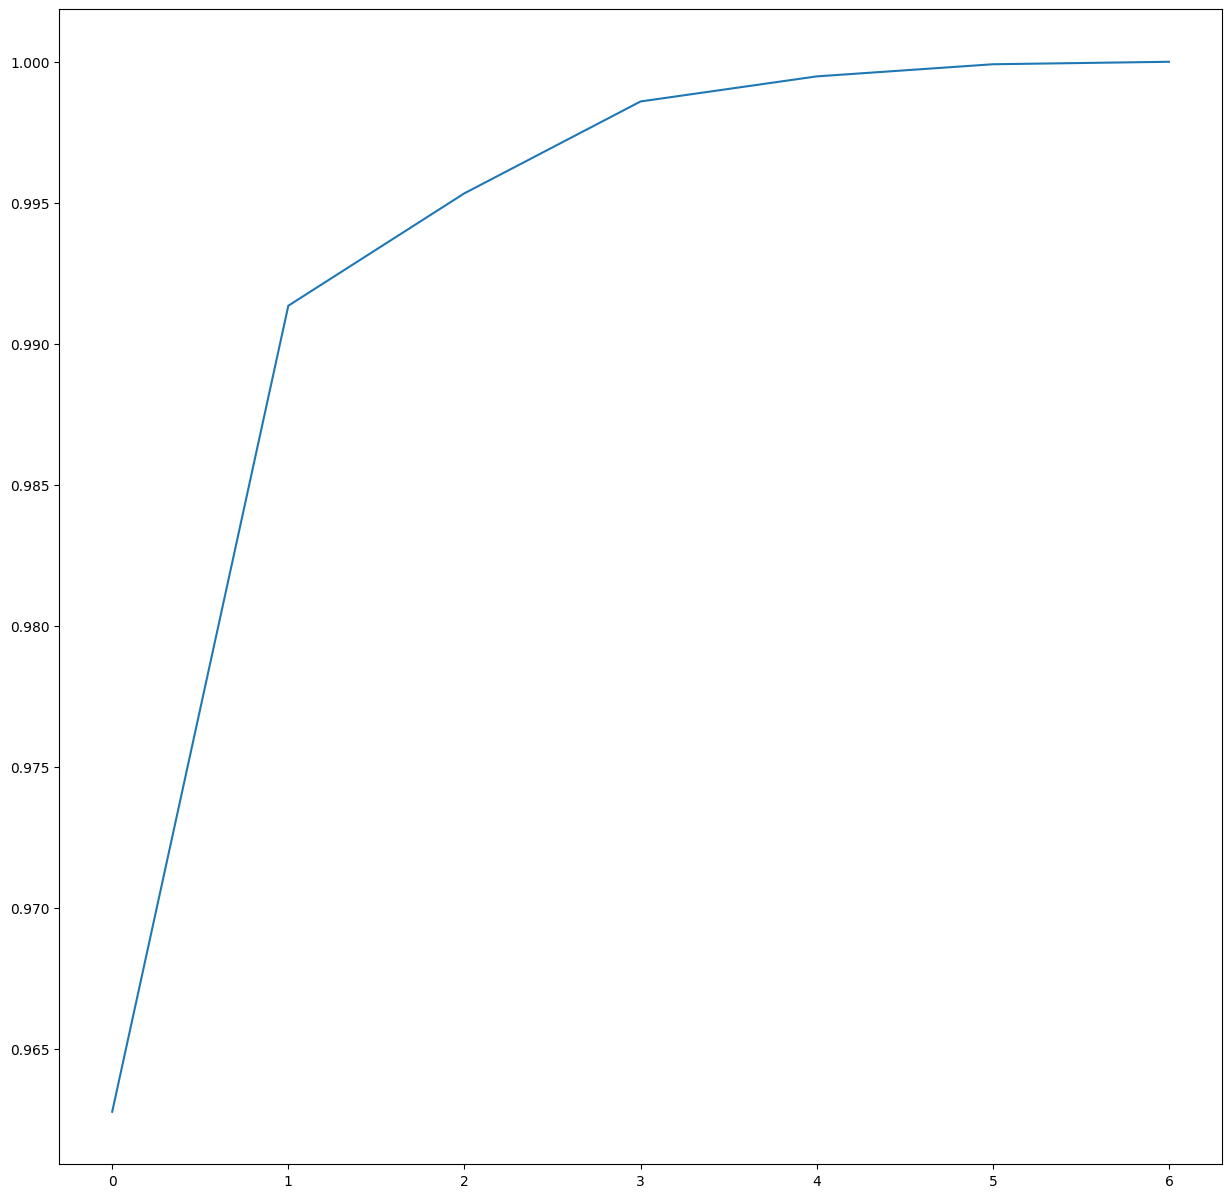

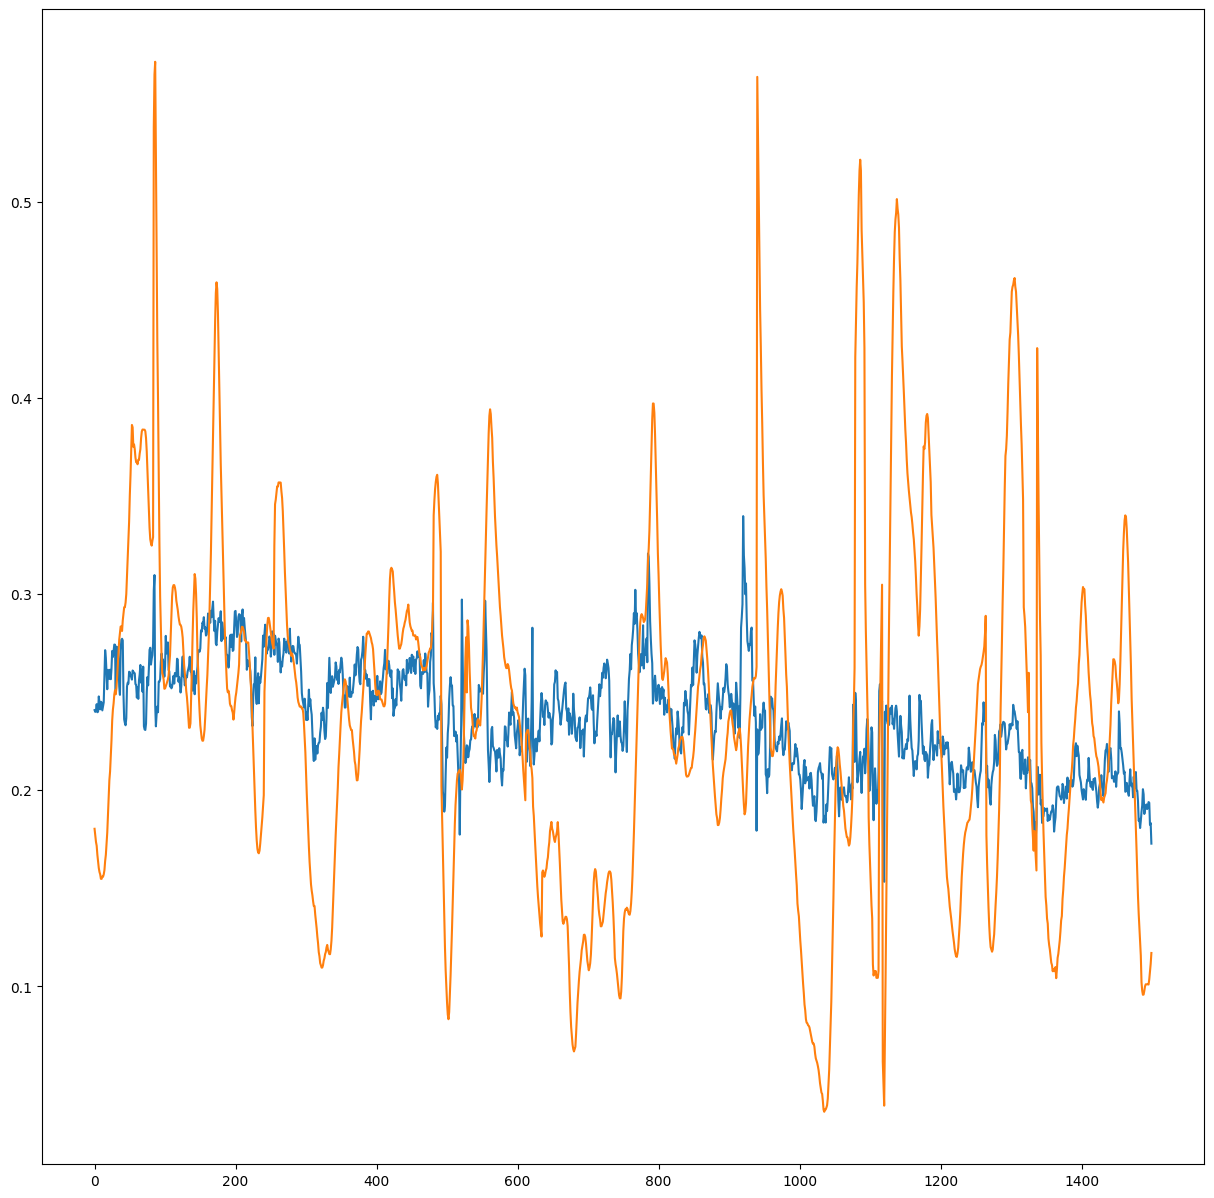

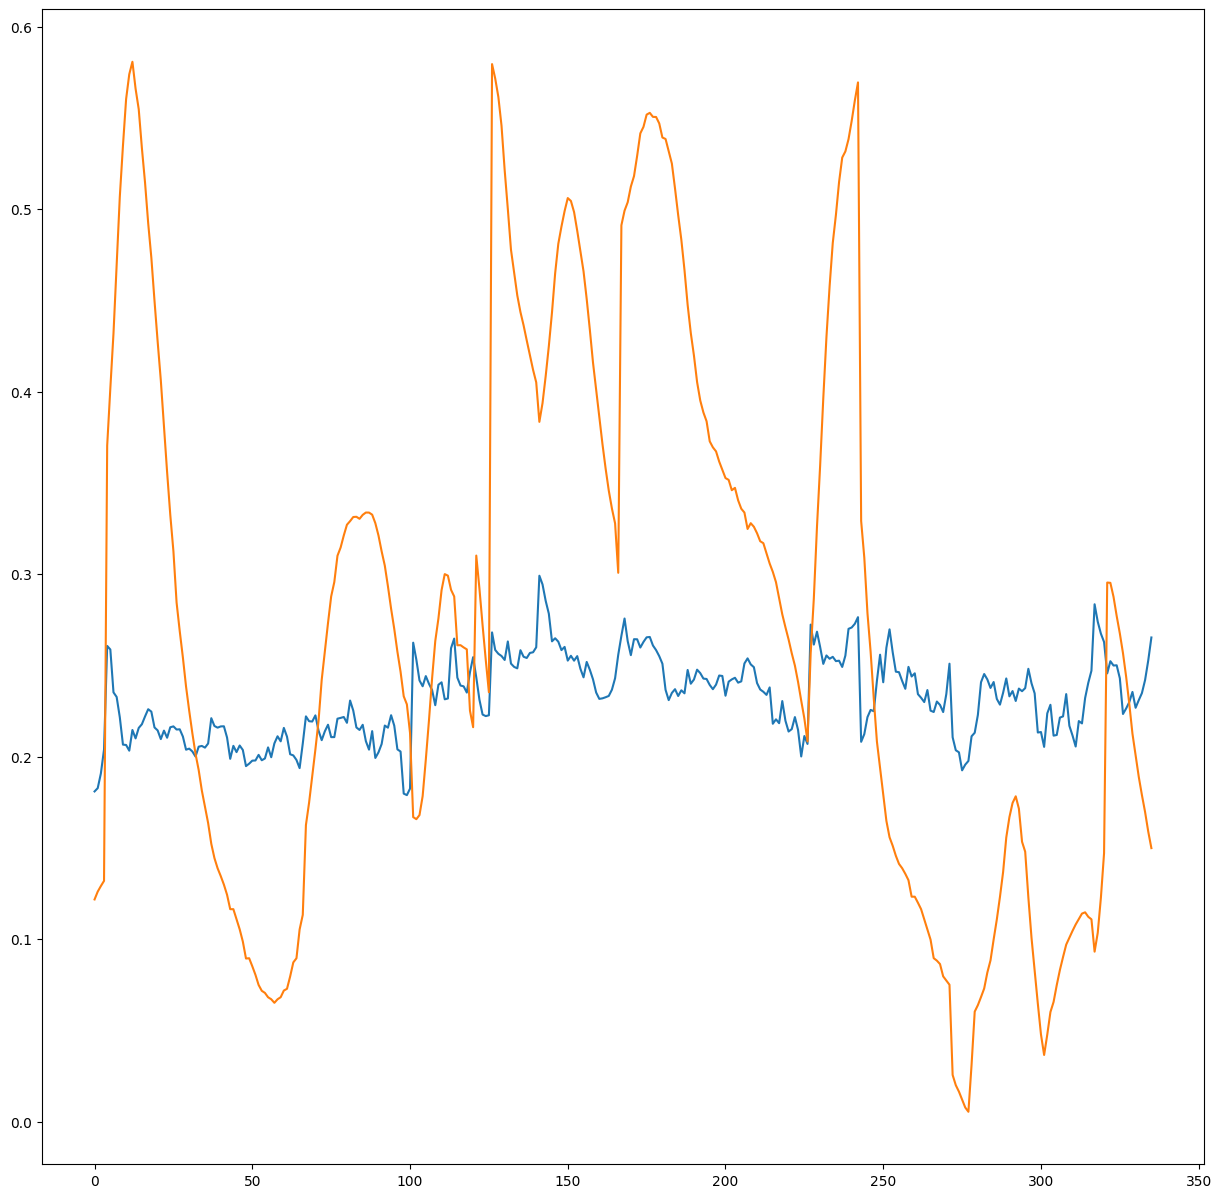

In [ ]:
# Principal component regression for developing soft sensor for debutanizer column used in refnery
# reference: Ajaya Kumar Pani a,*, Krunal G. Amin b, Hare Krishna Mohanta. Soft sensing of product quality in the debutanizer
# column with principal component analysis and feed-forward artificial neural network. Alexandria Engineering Journal (2016) 55, 1667–1674.

# Seshu Kumar Damarla, 01 April 2023
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# importing data
#from google.colab import files
#uploaded = files.upload()

xtrain = pd.read_csv('Xtrain.csv')
xtest = pd.read_csv('Xtest.csv')

ytrain = pd.read_csv('Ytrain.csv')
ytest = pd.read_csv('Ytest.csv')

xtrain = np.array(xtrain)
xtest = np.array(xtest)

xtrain = xtrain[0:1500,0:7]
xtest = xtest[0:336,0:7]

ytrain = np.array(ytrain)
ytest = np.array(ytest)

ytrain = ytrain[0:1500,0:7]
ytest = ytest[0:336,0:7]

print(xtrain)
print(ytrain)

#xtrain = np.delete(xtrain,0,1)
#xtest = np.delete(xtest,0,1)

#ytrain = np.delete(ytrain,0,1)
#ytest = np.delete(ytest,0,1)

n = xtrain.shape[0]

xmean = np.mean(xtrain, axis=0, keepdims=True, dtype=float)

# mean centered data
#xtrain = xtrain - xmean
#print(xtrain.shape)

corr_mat =np.dot(xtrain.T,xtrain)/(n-1)
print(corr_mat)

U, S, V = scipy.linalg.svd(corr_mat,full_matrices=True)
V = np.array(V)

#print(U.shape)
#print(S)
#print(V.shape)

sum_eigvalues = np.sum(S)

variance_explained = [(i/sum_eigvalues) for i in S]
variance_explained = variance_explained * 1
cum_sum_exp = np.cumsum(variance_explained)

plt.bar(range(0,len(variance_explained)), variance_explained, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,15))
plt.plot(range(0,len(cum_sum_exp)),cum_sum_exp)

# first 4 principal components carry most of the informaiton contained in xtrain
loading_matrix = V[:,0:4]
print(loading_matrix.shape)

# score matrix
score_matrix = np.dot(xtrain,loading_matrix)
score_matrix = np.array(np.append(np.ones((score_matrix.shape[0],1)),score_matrix,axis=1))
# print(T.shape)

# least squares solution
ab1 = np.linalg.inv(np.dot(score_matrix.T,score_matrix))
ab2 = np.dot(score_matrix.T,ytrain)
beta = np.dot(ab1,ab2)

print(beta.shape)

# model predictions on training data
ypred_train = np.dot(score_matrix,beta)
error_train = np.sum((ytrain-ypred_train)**2)
(R, pval) = stats.pearsonr(ytrain.flatten(),ypred_train.flatten())
print(R)
#print(error_train)

plt.figure(figsize=(15,15))
plt.plot(ypred_train)
plt.plot(ytrain)

#model predictions on test data
score_matrix_test = np.dot(xtest,loading_matrix)
score_matrix_test = np.array(np.append(np.ones((score_matrix_test.shape[0],1)),score_matrix_test,axis=1))

ypred_test = np.dot(score_matrix_test,beta)
#ypred_test = ypred_test*ystd + ymean

error_test = np.sum((ytest-ypred_test)**2)
(R, pval) = stats.pearsonr(ytest.flatten(),ypred_test.flatten())
print(R)
#print(error_test)

plt.figure(figsize=(15,15))
plt.plot(ypred_test)
plt.plot(ytest)


